# Assignment 5 - Data Visualization using # Pymaceuticals Inc.
---




### Analysis

     * When looking at the box plot the the effect of capomulin and Ramicane are relatelively same but defintley 
       more efficient than infubinol and Ceftamin.
     
     * When looking at one particular mouse with Capomulin drug it's significantly responding well after 30 days.
     
     * We have only one outlier for the drug infubinol while other drugs have no outliers thus the other drugs are 
       consistant in this study.
     
     * When we comparing Mouse weight and Tumor Volume the mouse with more weihgt have more tumor volume. It shows that 
       mouse with more weight is not responding well for the drugs. 
     
     * The correlation between mouse weight and the average tumor volume is:0.84. It's evident that we have a strong 
       correlation so the relationship between weight and tumor volume is positively relative. 

In [9]:
# Prepare the Data
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [10]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path ="data/study_results.csv"

In [11]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [12]:
# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata,study_results, how="outer", on ="Mouse ID")
# Display the data table for preview
combined_df.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [13]:
# Checking the number of mice.
no_of_mice = len(combined_df["Mouse ID"].value_counts())
no_of_mice

249

In [14]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# combined_df["Mouse ID"].duplicated()
dup_mice_df = combined_df.loc[combined_df.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
dup_mice_df

array(['g989'], dtype=object)

In [15]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = combined_df.loc[combined_df['Mouse ID']=="g989"]
duplicate_mice_df

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26         35   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1  
918           56.045564                 1  
919           59.082294                 1  
920           62.570880                 2

In [16]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.loc[combined_df['Mouse ID']!="g989"]
# combined_df.loc[~combined_df['Mouse ID'].isin(['g989','g990'])]
# clean_df.isna().any()
clean_df

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1880 rows x 8 columns]

In [20]:
# Checking the number of mice in the clean DataFrame.
mice_number_df =len( clean_df['Mouse ID'].unique())
mice_number_df

248

# Summary Statistics

In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_vol = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_vol = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var_vol = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_vol = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_vol = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
sum_df = pd.DataFrame({"Mean Tumor Volume": mean_vol,
                       "Median Tumor Volume": median_vol,
                       "Variance Tumor Volume":var_vol,
                       "STD Tumor Volume": std_vol,
                       "SEM Tumor Volume": sem_vol                     
                                 
    
    
})
sum_df

Mean Tumor Volume  Median Tumor Volume  Variance Tumor Volume  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              STD Tumor Volume  SEM Tumor Volume  
Drug Regimen                                      
Capomulin             4.994774          0.329346  
Ceftamin              6.268188          0.469821  
Infubinol             6.567243          0.492236  
Ketapril              8.279709          0.603860  
Naftisol              8.134708          0.596466  
Placebo               7.821003          0.581331  
Propriva              6.622085          0.544332  
Ramicane              4.846308          0.320955  
Stelasyn              7.710419          0.573111  
Zoniferol             6.966589          0.516398

In [22]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
sum_df2 = clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean','median','var','std','sem']})
sum_df2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

  ## Bar & Pie Charts

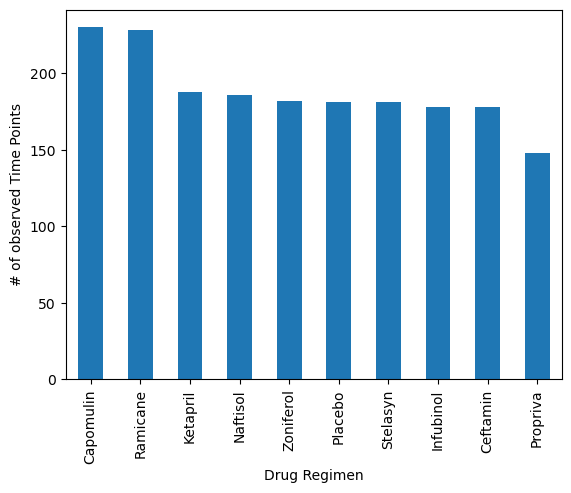

In [36]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_count = clean_df['Drug Regimen'].value_counts()
drug_count.plot(kind="bar", ylabel="# of observed Time Points")
plt.show()

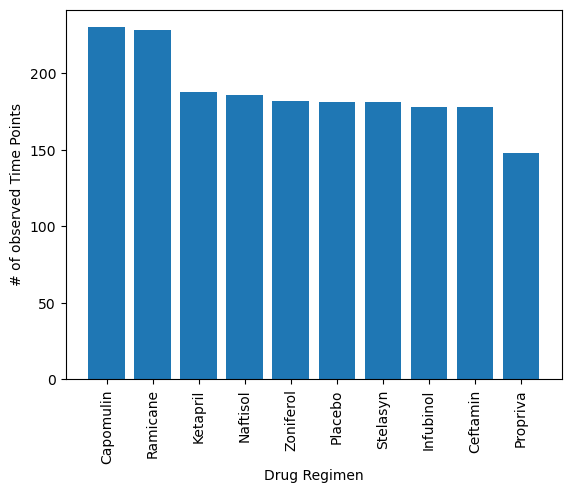

In [37]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(x=drug_count.index, height=drug_count.values)
plt.xticks(rotation=90)
plt.ylabel("# of observed Time Points")
plt.xlabel("Drug Regimen")
plt.show()

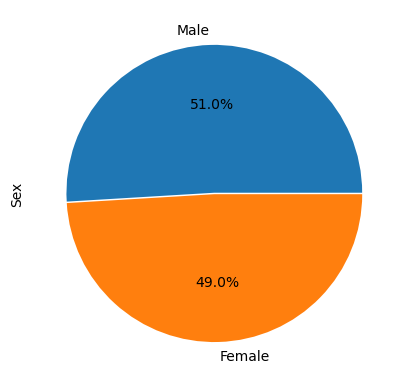

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count = clean_df['Sex'].value_counts()
explode = (0.01, 0)
gender_count.plot(kind="pie", ylabel="Sex",autopct='%.1f%%', explode = explode)
plt.show()

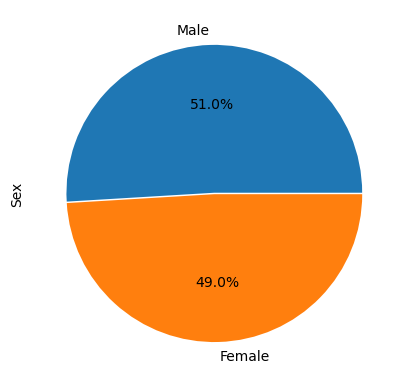

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
explode = (0.01, 0)
plt.pie(gender_count.values, labels=gender_count.index, autopct='%.1f%%',explode = explode)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots### 

In [40]:
#A DatFrame that has the last timepoint for each mouse ID is created using groupby.
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_tp_df = pd.DataFrame(clean_df.groupby('Mouse ID')['Timepoint'].max().sort_values())

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(clean_df, greatest_tp_df, on=['Mouse ID','Timepoint']).rename(columns={"Timepoint_x": "Timepoint", "Timepoint_y": "Max Timepoint"})

merged_df.head()



Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane    Male          21          16         45   
1     s185    Capomulin  Female           3          17         45   
2     x401    Capomulin  Female          16          15         45   
3     m601    Capomulin    Male          22          17         45   
4     g791     Ramicane    Male          11          16         45   

   Tumor Volume (mm3)  Metastatic Sites  
0           22.050126                 1  
1           23.343598                 1  
2           28.484033                 0  
3           28.430964                 1  
4           29.128472                 1

In [49]:
# # Put treatments into a list for for loop (and later for plot labels)

drugs =['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# # Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# # Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
#     # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drugs:
    df1=merged_df.loc[merged_df['Drug Regimen']== drug,'Tumor Volume (mm3)']
        
    # add subset 
    tumor_vol.append(df1)
    
     # Calculate the IQR and quantitatively determine if there are any potential outliers.
     # Determine outliers using upper and lower bounds

    quartiles = df1.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f'IQR for {drug} is : {iqr}')
     # Find upper and lower bounds to help identify outliers for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
     #check for outliers
    df_outliers = df1[(df1 < lower_bound) | (df1> upper_bound)].count()
    print(f'Number of {drug} Outlier: {df_outliers}')

IQR for Capomulin is : 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin Outlier: 0
IQR for Ramicane is : 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane Outlier: 0
IQR for Infubinol is : 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol Outlier: 1
IQR for Ceftamin is : 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin Outlier: 0


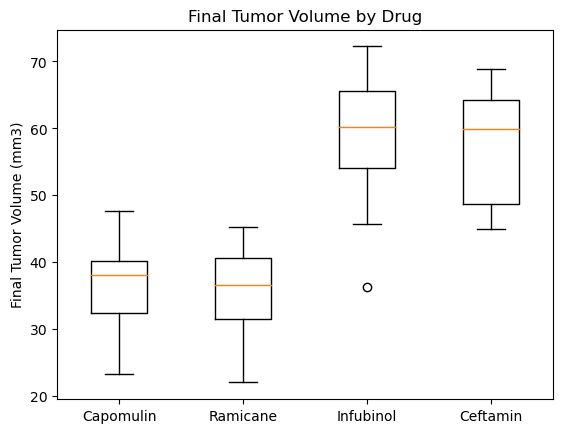

In [45]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol)
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

### Line and Scatter Plots

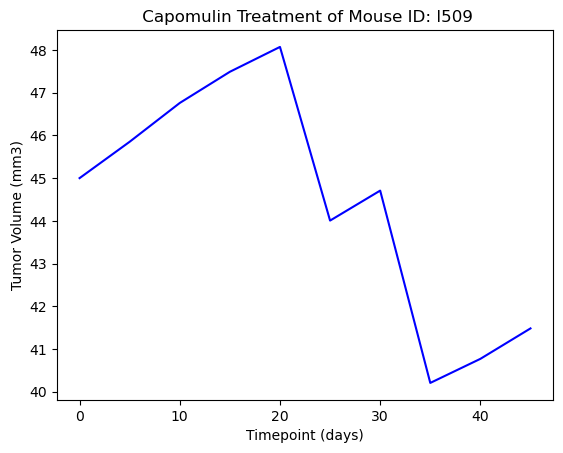

In [50]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
singlemouse_Capomulin = clean_df.loc[clean_df['Mouse ID']=="l509",:]
x_axis = singlemouse_Capomulin['Timepoint'].count()
x= singlemouse_Capomulin['Timepoint']
y= singlemouse_Capomulin['Tumor Volume (mm3)']
plt.plot(x,y,color = "blue")
plt.title(" Capomulin Treatment of Mouse ID: l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

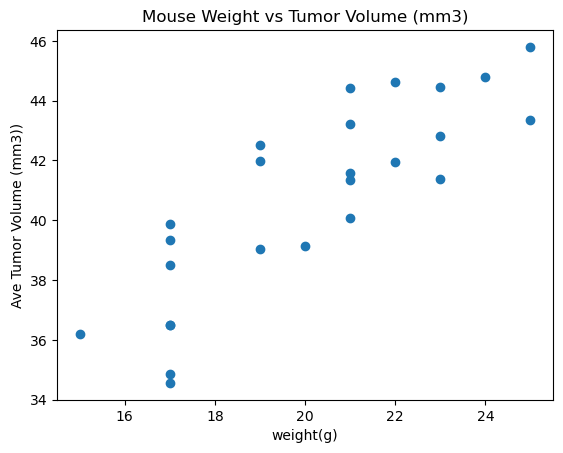

In [51]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Isolate cases that only use the Capomulin regimen

capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

# Find average tumor volume for each mouse
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values())
avg1_vol_df=avg_vol_df.rename(columns={"Tumor Volume (mm3)":"Ave Tumor Volume (mm3)"}).reset_index()
avg1_vol_df

# Merge average tumor volume onto data_df and drop duplicates
avg_vol_df = pd.merge(capomulin_df, avg1_vol_df , on='Mouse ID')
final_avg_vol_df = avg_vol_df [['Weight (g)', 'Ave Tumor Volume (mm3)']].drop_duplicates()
final_avg_vol_df

# Plot the scatter plot with final ave weight with Ave Tumor Volume
x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['Ave Tumor Volume (mm3)']
plt.scatter(x, y)
plt.xlabel("weight(g)")
plt.ylabel("Ave Tumor Volume (mm3))")
plt.title("Mouse Weight vs Tumor Volume (mm3)")
plt.show()

### Correlation and Regression

The correlation between mouse weight and the average tumor volume is:0.84


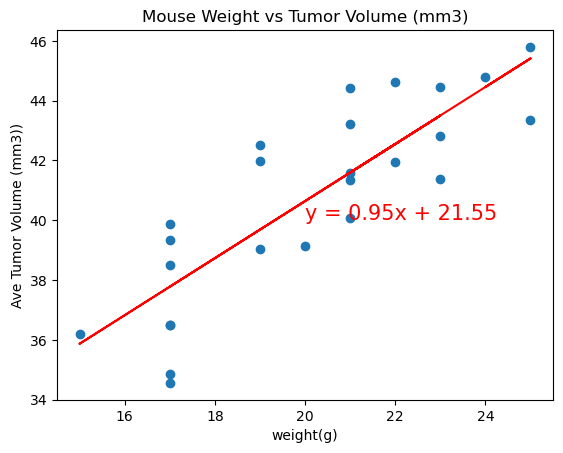

In [52]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
#Take x,y value from the above part

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['Ave Tumor Volume (mm3)']
# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)
print(f'The correlation between mouse weight and the average tumor volume is:{round(correlation[0],2)}')

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot      
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.xlabel("weight(g)")
plt.ylabel("Ave Tumor Volume (mm3))")
plt.title("Mouse Weight vs Tumor Volume (mm3)")
plt.show()